# Predicting likelihood of a person to be diabetic

Link to the dataset: https://data.world/informatics-edu/diabetes-prediction

The dataset contains information on patients which can be used to predict if the patient has diabetes.

**Dataset information:** More than 37 million people in the United States have diabetes, and 1 in 5 of them don't know they have it. 96 million US adults—over a third—have prediabetes, and more than 8 in 10 of them don't know they have it. Diabetes is the 7th leading cause of death in the United States (and may be underreported). Several hundred rural African-American patients were tested and their medical results recorded for purposes of research. The diabetes.csv file contains the raw data of all patients. The Diabetes.csv file will be cleaned and manipulated. in an attempt to predict who is likely to have diabetes based on their hemoglobin A1c. 

# 1)  Defining the question

a) Objectives

Main objective: 

Predicting whether a person has diabetes or not.

Specific objectives:

 Perform 
- Data exploration
- Data pre-processing
- Build the regression model to predict whether a person has diabetes or not.
- Evaluate the model and report the results


b) Metrics For success

Should have:
- Feature engineering to extract meaningful features fro the model.
- A detailed interpretation of the statistical and economical significance

c) Context

Prediction of diabetes at an early stage can lead to improved treatment. Data mining techniques are widely used for prediction of disease at an early stage. In this research project, diabetes is predicted using significant attributes using logistic regression model.




# 2) Reading Data

In [157]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

%matplotlib inline

from nltk.tokenize.api import TokenizerI

# import TweetTokenizer() method from nltk
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
    cross_val_score,
)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)

# To oversample data
from imblearn.over_sampling import SMOTE


In [158]:
conda install -c conda-forge imbalanced-learn


Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [159]:
pip install Tensorflow


Note: you may need to restart the kernel to use updated packages.


In [160]:
pip install imblearn 


In [161]:
pip: pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command ":"



In [162]:
conda install -c glemaitre imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [163]:
# Improving visual appearance of graphs
sns.set(rc={'figure.figsize':(13, 10)})

# Ensure all columns are displayed
pd.pandas.set_option('display.max_columns', None)

In [164]:
#load data into a dataframe
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,id,chol,stab.glu,hdl,ratio,glyhb,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,1000,203.0,82,56.0,3.6,4.31,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1,1001,165.0,97,24.0,6.9,4.44,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
2,1002,228.0,92,37.0,6.2,4.64,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
3,1003,78.0,93,12.0,6.5,4.63,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
4,1005,249.0,90,28.0,8.9,7.72,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


# 3) Data exploration

**Attribute information**

The data set contains the following attributes:

* id: Identifies patients by number
* chol: Total cholesterol
* stab.glu: Glucose - Fasting blood sugar
* hdl: HDL or good cholesterol
* ratio: Chol/HDL - Ratio of total cholesterol to good cholesterol. Desirable result is < 5
* glyhb: Hemoglobin A1c. HbA1c equal to greater to 6.5 indicates the person has diabetes.
* age
* gender
* height: Measured in inches
* weight: Measured in pounds (lbs)
* frame: Body frame (small/medium/large)
* bp.1s: BP Systolic - The upper number of blood pressure
* bp.1d: BP Diastolic - The lower number of blood pressure
* waist: Measured in inches
* hip: Measured in inches

**Previewing the top of our dataset**

In [165]:
diabetes.head()

,id,chol,stab.glu,hdl,ratio,glyhb,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,1000,203.0,82,56.0,3.6,4.31,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1,1001,165.0,97,24.0,6.9,4.44,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
2,1002,228.0,92,37.0,6.2,4.64,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
3,1003,78.0,93,12.0,6.5,4.63,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
4,1005,249.0,90,28.0,8.9,7.72,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


**Previewing the bottom of our dataset**

In [166]:
diabetes.tail()

,id,chol,stab.glu,hdl,ratio,glyhb,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
398,41506,296.0,369,46.0,6.4,16.110001,53,male,69.0,173.0,medium,138.0,94.0,35.0,39.0
399,41507,284.0,89,54.0,5.3,4.390000,51,female,63.0,154.0,medium,140.0,100.0,32.0,43.0
400,41510,194.0,269,38.0,5.1,13.630000,29,female,69.0,167.0,small,120.0,70.0,33.0,40.0
401,41752,199.0,76,52.0,3.8,4.490000,41,female,63.0,197.0,medium,120.0,78.0,41.0,48.0
402,41756,159.0,88,79.0,2.0,NaN,68,female,64.0,220.0,medium,100.0,72.0,49.0,58.0


In [167]:
#Generate the summary of descriptive statistics on the dataset
diabetes.describe()

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
count,403.000000,402.000000,403.000000,402.000000,402.000000,390.000000,403.000000,398.000000,402.000000,398.000000,398.000000,401.000000,401.000000
mean,15978.310174,207.845771,106.672457,50.445274,4.521642,5.589769,46.851117,66.020101,177.592040,136.904523,83.321608,37.900249,43.039900
std,11881.122124,44.445557,53.076655,17.262626,1.727886,2.242595,16.312333,3.918515,40.340666,22.741033,13.589227,5.729313,5.656713
min,1000.000000,78.000000,48.000000,12.000000,1.500000,2.680000,19.000000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000
25%,4792.500000,179.000000,81.000000,38.000000,3.200000,4.380000,34.000000,63.000000,151.000000,121.250000,75.000000,33.000000,39.000000
50%,15766.000000,204.000000,89.000000,46.000000,4.200000,4.840000,45.000000,66.000000,172.500000,136.000000,82.000000,37.000000,42.000000
75%,20336.000000,230.000000,106.000000,59.000000,5.400000,5.600000,60.000000,69.000000,200.000000,146.750000,90.000000,41.000000,46.000000
max,41756.000000,443.000000,385.000000,120.000000,19.299999,16.110001,92.000000,76.000000,325.000000,250.000000,124.000000,56.000000,64.000000


**Checking whether each column has an appropriate datatype**

In [168]:
diabetes.dtypes

id            int64
chol        float64
stab.glu      int64
hdl         float64
ratio       float64
glyhb       float64
age           int64
gender       object
height      float64
weight      float64
frame        object
bp.1s       float64
bp.1d       float64
waist       float64
hip         float64
dtype: object

**Determining the no. of records in our dataset**

In [169]:
#Obtain the shape of the dataset
diabetes.shape

(403, 15)

In [170]:
#get information about the dataframe
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   age       403 non-null    int64  
 7   gender    403 non-null    object 
 8   height    398 non-null    float64
 9   weight    402 non-null    float64
 10  frame     391 non-null    object 
 11  bp.1s     398 non-null    float64
 12  bp.1d     398 non-null    float64
 13  waist     401 non-null    float64
 14  hip       401 non-null    float64
dtypes: float64(10), int64(3), object(2)
memory usage: 47.4+ KB


**Correlation of the variables**

In [171]:
#Are the independent variables correlated? We get the Pearson's correlation to find out. A heatmap can also give better visualization.
corr = diabetes.corr()
corr 

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
id,1.000000,0.059243,0.009315,0.059255,-0.034094,0.010378,-0.011083,-0.036948,-0.018658,0.013715,0.084001,-0.008123,0.048658
chol,0.059243,1.000000,0.150092,0.186581,0.475521,0.247099,0.233119,-0.058858,0.066889,0.203344,0.171605,0.124489,0.079402
stab.glu,0.009315,0.150092,1.000000,-0.161899,0.280349,0.749236,0.289258,0.090669,0.185453,0.166467,0.022014,0.218446,0.133502
hdl,0.059255,0.186581,-0.161899,1.000000,-0.686907,-0.149145,0.038088,-0.101419,-0.290983,0.019804,0.065732,-0.268369,-0.210060
ratio,-0.034094,0.475521,0.280349,-0.686907,1.000000,0.328665,0.148510,0.094335,0.281649,0.119386,0.048193,0.304162,0.194622
glyhb,0.010378,0.247099,0.749236,-0.149145,0.328665,1.000000,0.338929,0.063023,0.171882,0.197936,0.032375,0.226184,0.141401
age,-0.011083,0.233119,0.289258,0.038088,0.148510,0.338929,1.000000,-0.090493,-0.055970,0.443041,0.058227,0.149645,0.008819
height,-0.036948,-0.058858,0.090669,-0.101419,0.094335,0.063023,-0.090493,1.000000,0.251251,-0.047827,0.038598,0.051094,-0.107832
weight,-0.018658,0.066889,0.185453,-0.290983,0.281649,0.171882,-0.055970,0.251251,1.000000,0.090873,0.175956,0.849855,0.829115
bp.1s,0.013715,0.203344,0.166467,0.019804,0.119386,0.197936,0.443041,-0.047827,0.090873,1.000000,0.596557,0.196489,0.136655


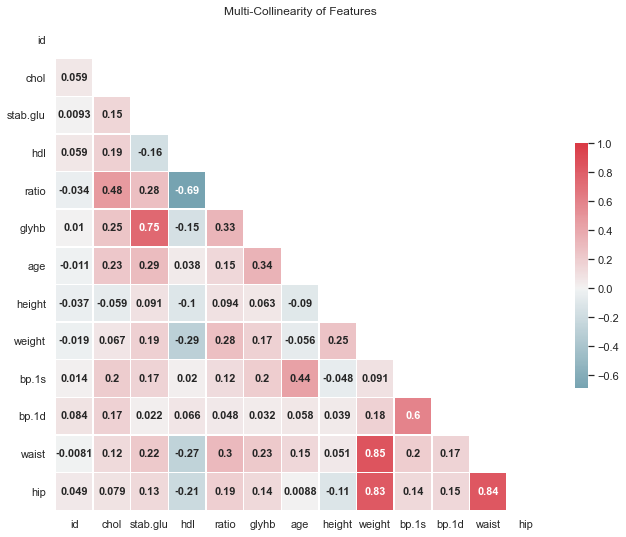

In [172]:
sns.set(style="white")
# Create a covariance matrix
corr = diabetes.corr()

# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5},
            annot=True,
            annot_kws={'fontsize':11, 'fontweight':'bold'})

            
ax.set_title('Multi-Collinearity of Features')
plt.savefig('correlation2.png')


**Checking for outliers**

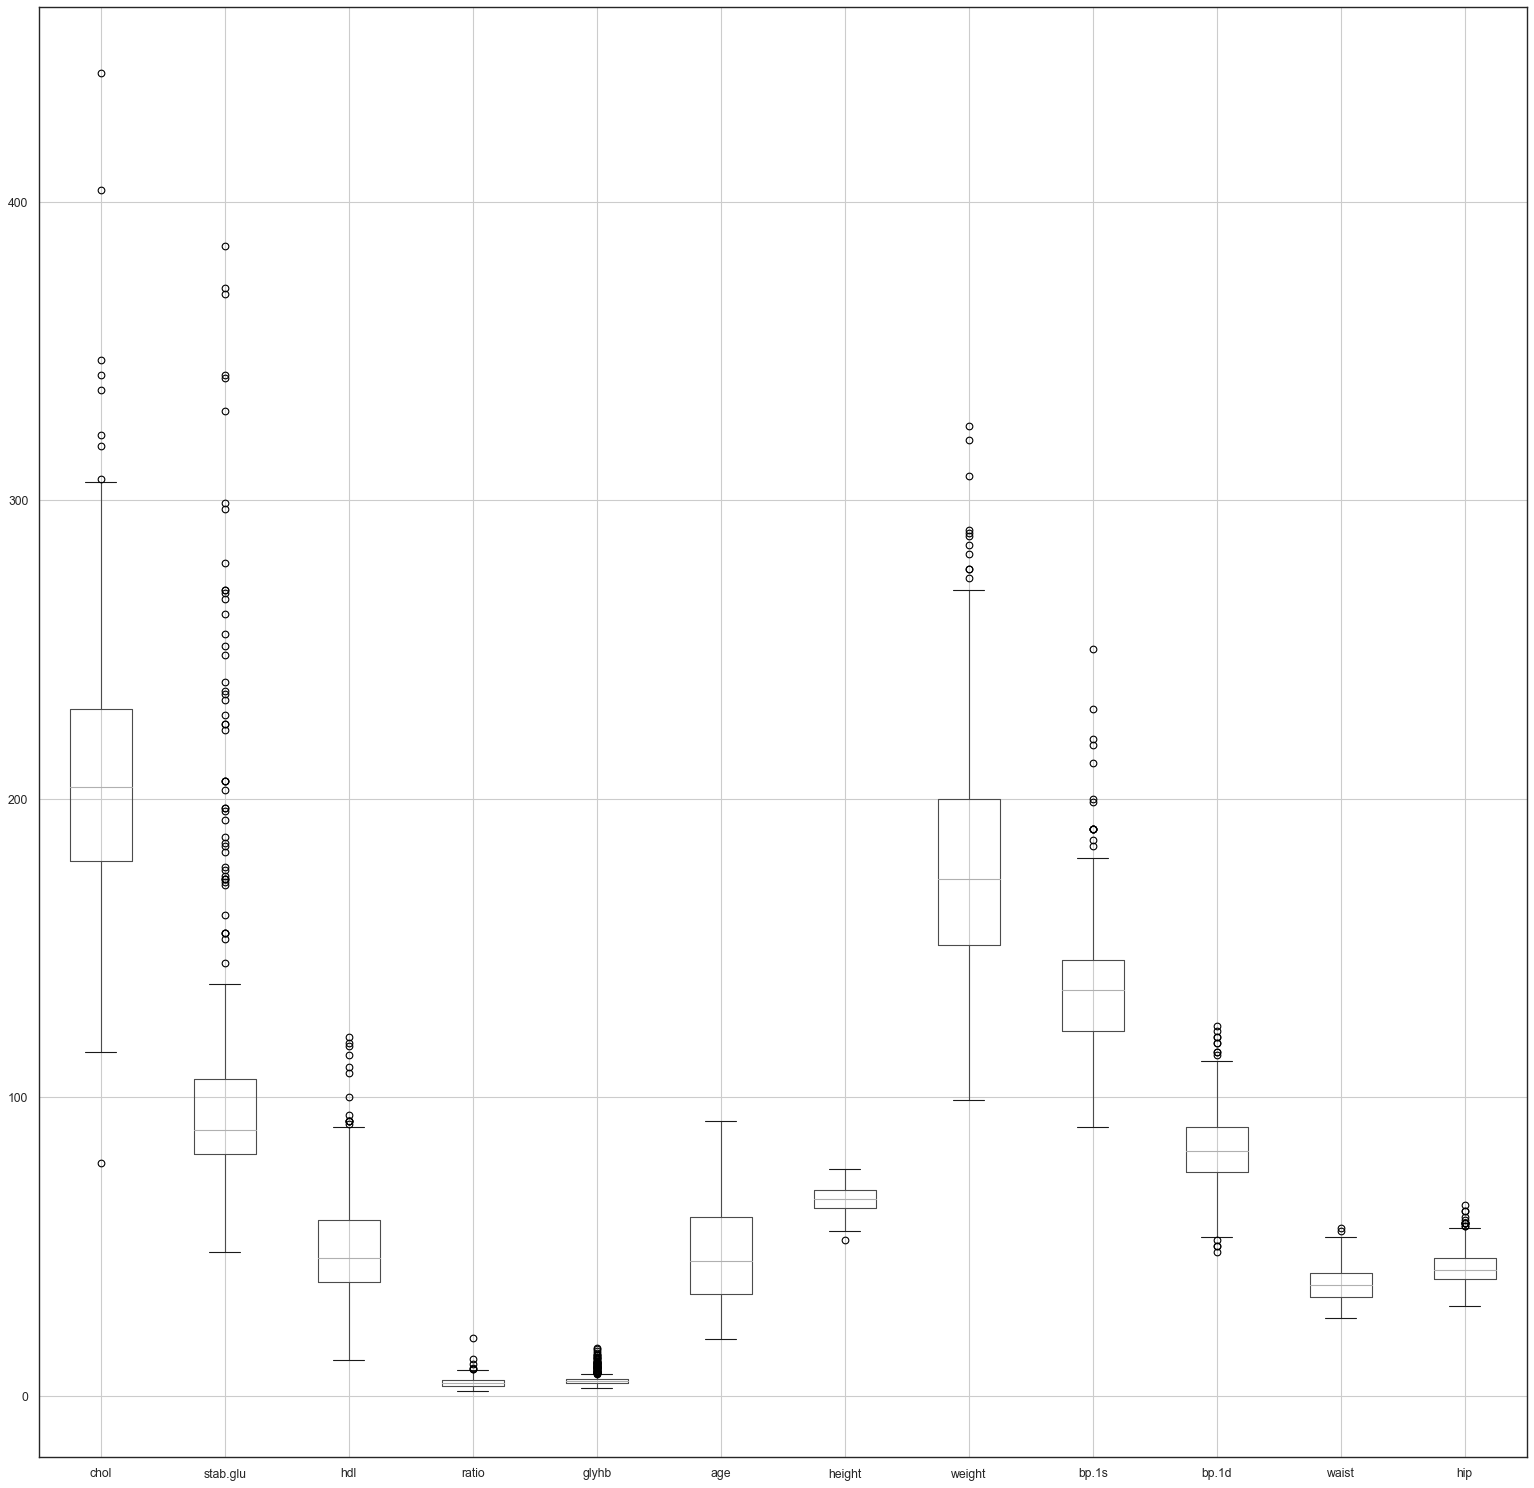

In [211]:
fig = plt.figure(figsize=(24, 24), dpi=80, facecolor="w", edgecolor="k")
boxplot = diabetes.boxplot(column=["chol", "stab.glu", "hdl","ratio","glyhb","age","height","weight","bp.1s","bp.1d","waist","hip"])

# 4) Tidying the Dataset


**Checking for missing values**

In [174]:
#check for null values
diabetes.isnull().sum()

id           0
chol         1
stab.glu     0
hdl          1
ratio        1
glyhb       13
age          0
gender       0
height       5
weight       1
frame       12
bp.1s        5
bp.1d        5
waist        2
hip          2
dtype: int64

**Checking for duplicated values**

In [175]:
#check for duplicated values
diabetes.duplicated().sum()

0

### Dealing with missing values

In [176]:
diabetes = diabetes.fillna(diabetes.mean())

In [177]:
diabetes['frame'] = diabetes['frame'].fillna(diabetes['frame'].mode()[0])

In [178]:
diabetes.isnull().sum()

id          0
chol        0
stab.glu    0
hdl         0
ratio       0
glyhb       0
age         0
gender      0
height      0
weight      0
frame       0
bp.1s       0
bp.1d       0
waist       0
hip         0
dtype: int64

# 5) Data Visualization

**One detailed visualization to see distribution of different features when one has diabetes. I.e has a glyhb of 6.5 and above**

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'stab.glu'}>,
        <AxesSubplot:title={'center':'hdl'}>],
       [<AxesSubplot:title={'center':'ratio'}>,
        <AxesSubplot:title={'center':'glyhb'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'bp.1s'}>,
        <AxesSubplot:title={'center':'bp.1d'}>,
        <AxesSubplot:title={'center':'waist'}>],
       [<AxesSubplot:title={'center':'hip'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

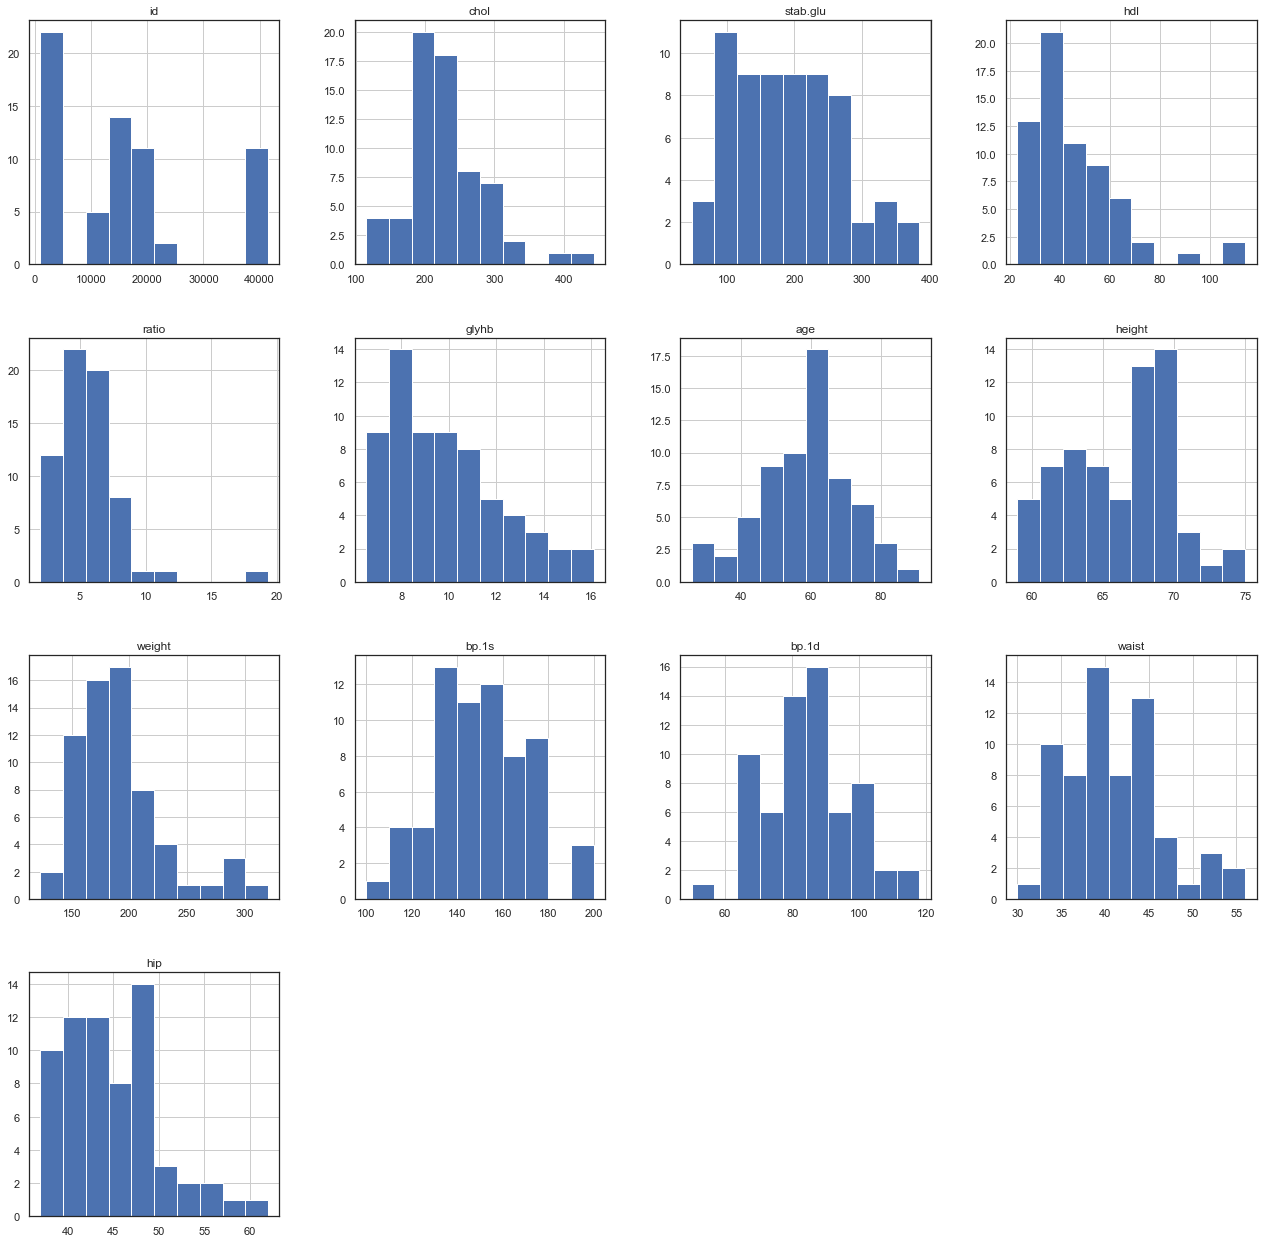

In [179]:
diabetes[diabetes['glyhb']>= 6.5].hist(figsize=(22, 22))



# 6) Feature Engineering

**Create a new column to indicate presence and absence of diabetes**

In [180]:
#Create a new column to indicate presence and absence of diabetes
diabetes['Diabetic'] = diabetes['glyhb']>= 6.5
diabetes['Diabetic'].replace({False:0, True:1}, inplace=True)
diabetes.head()

,id,chol,stab.glu,hdl,ratio,glyhb,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,Diabetic
0,1000,203.0,82,56.0,3.6,4.31,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,0
1,1001,165.0,97,24.0,6.9,4.44,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,0
2,1002,228.0,92,37.0,6.2,4.64,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,0
3,1003,78.0,93,12.0,6.5,4.63,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,0
4,1005,249.0,90,28.0,8.9,7.72,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,1


### One hot encoding

**According to the attribute information above, some of the variables are categorical.We haowever require them to be numerical for our model. We can convert them into their correct categories as follows...**

In [181]:
#check for unique values in frame 
diabetes['gender'].unique()

array(['female', 'male'], dtype=object)

In [182]:
#check for unique values in frame 
diabetes['frame'].unique()

array(['medium', 'large', 'small'], dtype=object)

In [183]:
#one-hot encode(binarise) the Gender column to have a separate column for each gender 
diabetes = pd.get_dummies(diabetes, columns=["gender", 'frame'])
print(diabetes)

        id   chol  stab.glu   hdl  ratio      glyhb  age  height  weight  \
0     1000  203.0        82  56.0    3.6   4.310000   46    62.0   121.0   
1     1001  165.0        97  24.0    6.9   4.440000   29    64.0   218.0   
2     1002  228.0        92  37.0    6.2   4.640000   58    61.0   256.0   
3     1003   78.0        93  12.0    6.5   4.630000   67    67.0   119.0   
4     1005  249.0        90  28.0    8.9   7.720000   64    68.0   183.0   
..     ...    ...       ...   ...    ...        ...  ...     ...     ...   
398  41506  296.0       369  46.0    6.4  16.110001   53    69.0   173.0   
399  41507  284.0        89  54.0    5.3   4.390000   51    63.0   154.0   
400  41510  194.0       269  38.0    5.1  13.630000   29    69.0   167.0   
401  41752  199.0        76  52.0    3.8   4.490000   41    63.0   197.0   
402  41756  159.0        88  79.0    2.0   5.589769   68    64.0   220.0   

     bp.1s  bp.1d  waist   hip  Diabetic  gender_female  gender_male  \
0    118.0   59

In [184]:
diabetes.isnull().sum()

id               0
chol             0
stab.glu         0
hdl              0
ratio            0
glyhb            0
age              0
height           0
weight           0
bp.1s            0
bp.1d            0
waist            0
hip              0
Diabetic         0
gender_female    0
gender_male      0
frame_large      0
frame_medium     0
frame_small      0
dtype: int64

Text(0.5, 1.0, 'Distribution of diabetic vs non-diabetic people')

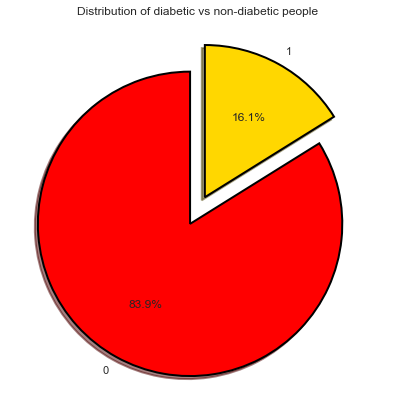

In [185]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = diabetes['Diabetic'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of diabetic vs non-diabetic people')


From the above visual, we can see that people considered to be diabetic are comparatively lesser than those not, so this is a situation of an unbalanced data.


If we will fit this data to train our diabetes prediction model, then the model will not generalize any diabetic people because the data with context to the diabetic is significantly less than those without . So in this situation, we will need to prepare the data to fit properly in our model.

First let's train the model with the data as it is before resampling, then after upsampling

# 7) Feature selection

### Checking for multi-collinearity

**Multicollinearity happens when independent variables in the regression model are highly correlated to each other. It makes it hard to interpret for model and also creates an overfitting problem**

In [186]:
#Are the independent variables correlated? We get the Pearson's correlation to find out. A heatmap can also give better visualization.
corr = diabetes.corr()
corr 

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip,Diabetic,gender_female,gender_male,frame_large,frame_medium,frame_small
id,1.000000,0.059130,0.009315,0.059142,-0.034029,0.010164,-0.011083,-0.036842,-0.018658,0.013613,0.083374,-0.008075,0.048370,0.008627,-0.018867,0.018867,-0.121499,-0.018121,0.141814
chol,0.059130,1.000000,0.150021,0.186581,0.475521,0.244407,0.233118,-0.058324,0.066239,0.202520,0.171015,0.123726,0.078967,0.207415,0.015663,-0.015663,0.002038,0.117604,-0.136365
stab.glu,0.009315,0.150021,1.000000,-0.161823,0.280216,0.747041,0.289258,0.090315,0.184010,0.166285,0.021990,0.218297,0.133411,0.685887,-0.089297,0.089297,0.160621,-0.035944,-0.119057
hdl,0.059142,0.186581,-0.161823,1.000000,-0.686907,-0.146987,0.038087,-0.100981,-0.289370,0.019732,0.065483,-0.266577,-0.208785,-0.126135,0.113834,-0.113834,-0.198835,0.022121,0.172939
ratio,-0.034029,0.475521,0.280216,-0.686907,1.000000,0.325137,0.148509,0.094176,0.280148,0.119153,0.048134,0.301908,0.193302,0.283366,-0.113095,0.113095,0.159980,0.060944,-0.229089
glyhb,0.010164,0.244407,0.747041,-0.146987,0.325137,1.000000,0.335930,0.061628,0.166749,0.196383,0.031711,0.223218,0.138550,0.855214,-0.049657,0.049657,0.131867,0.011072,-0.144098
age,-0.011083,0.233118,0.289258,0.038087,0.148509,0.335930,1.000000,-0.090358,-0.055937,0.442328,0.058133,0.149434,0.008807,0.311686,-0.073509,0.073509,0.215558,-0.041083,-0.167951
height,-0.036842,-0.058324,0.090315,-0.100981,0.094176,0.061628,-0.090358,1.000000,0.249728,-0.047200,0.037991,0.050888,-0.106813,0.013381,-0.676997,0.676997,0.092106,-0.089253,0.010133
weight,-0.018658,0.066239,0.184010,-0.289370,0.280148,0.166749,-0.055937,0.249728,1.000000,0.090466,0.174984,0.846362,0.826496,0.149066,-0.090791,0.090791,0.381702,0.008581,-0.390299
bp.1s,0.013613,0.202520,0.166285,0.019732,0.119153,0.196383,0.442328,-0.047200,0.090466,1.000000,0.596557,0.194850,0.135562,0.219457,-0.030733,0.030733,0.111107,0.058801,-0.177922


**Visual representation of multi-colinearity**

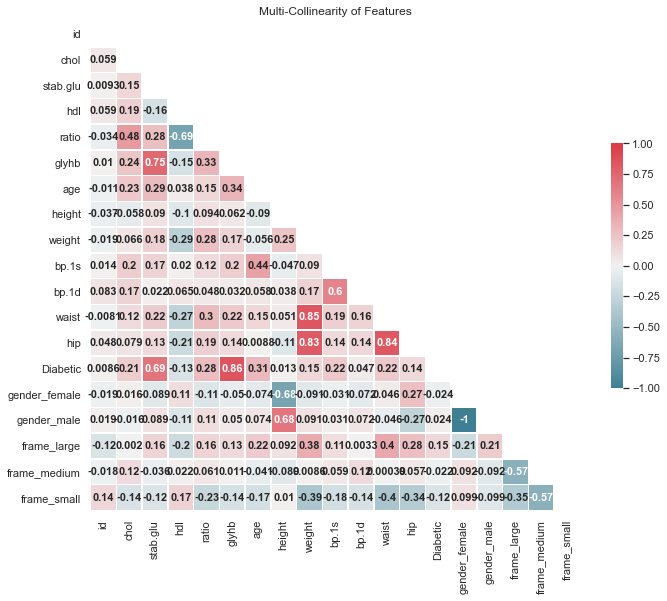

In [187]:
sns.set(style="white")
# Create a covariance matrix
corr = diabetes.corr()

# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5},
            annot=True,
            annot_kws={'fontsize':11, 'fontweight':'bold'})

            
ax.set_title('Multi-Collinearity of Features')
plt.savefig('correlation2.png')


In [188]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
print(upper_tri)

               id     chol  stab.glu       hdl     ratio     glyhb       age  \
id            NaN  0.05913  0.009315  0.059142 -0.034029  0.010164 -0.011083   
chol          NaN      NaN  0.150021  0.186581  0.475521  0.244407  0.233118   
stab.glu      NaN      NaN       NaN -0.161823  0.280216  0.747041  0.289258   
hdl           NaN      NaN       NaN       NaN -0.686907 -0.146987  0.038087   
ratio         NaN      NaN       NaN       NaN       NaN  0.325137  0.148509   
glyhb         NaN      NaN       NaN       NaN       NaN       NaN  0.335930   
age           NaN      NaN       NaN       NaN       NaN       NaN       NaN   
height        NaN      NaN       NaN       NaN       NaN       NaN       NaN   
weight        NaN      NaN       NaN       NaN       NaN       NaN       NaN   
bp.1s         NaN      NaN       NaN       NaN       NaN       NaN       NaN   
bp.1d         NaN      NaN       NaN       NaN       NaN       NaN       NaN   
waist         NaN      NaN       NaN    

<ipython-input-188-05ebe19effb4>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


### Droping the column with high correlation


**So we are selecting the columns which are having absolute correlation greater than 0.80 and making a list of those columns named 'to_drop'.**

In [189]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(); print(to_drop)


['waist', 'hip', 'Diabetic']


**Dropping columns with evidence of milti-colinearity**

Now we are droping the columns which are in the list **'to_drop'** from the dataset to deal with multi-colinearity. Also, from the attribute information, You should notice that the **hbl** column is cholesterol level while **ratio** column isthe ratio of total cholesterol to good cholesterol and the desirable level should be <5. So we'll ignore the hbl columns during *feature selection* asboth colums give information on level of cholesterol and ratio gives more meaningful cholesterol information to remove redundancy from our data.

In [190]:
clean_diabetes = diabetes.drop(columns=["waist", "hip", "hdl","id"], axis = 1)



In [191]:
clean_diabetes.head()

,chol,stab.glu,ratio,glyhb,age,height,weight,bp.1s,bp.1d,Diabetic,gender_female,gender_male,frame_large,frame_medium,frame_small
0,203.0,82,3.6,4.31,46,62.0,121.0,118.0,59.0,0,1,0,0,1,0
1,165.0,97,6.9,4.44,29,64.0,218.0,112.0,68.0,0,1,0,1,0,0
2,228.0,92,6.2,4.64,58,61.0,256.0,190.0,92.0,0,1,0,1,0,0
3,78.0,93,6.5,4.63,67,67.0,119.0,110.0,50.0,0,0,1,1,0,0
4,249.0,90,8.9,7.72,64,68.0,183.0,138.0,80.0,1,0,1,0,1,0


In [192]:
clean_diabetes.shape

(403, 15)

# 8) Model development

### Model prediction

**Define the features `X` (the input features) and label `y` (the output feature)**


In [193]:
X = clean_diabetes.drop(columns=["Diabetic"])

y = clean_diabetes["Diabetic"]

**Standardise all the input features**

In [194]:
X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

Next we split the data into training and testing sets **before** anything else i.e **sampling** in order to avoid overfitting and model leakage

## Train test split


**Generate the test and train datasets from your `X` and `y` data, with 30% of the data for testing**

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=0, stratify=y)

In [196]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("\n")
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("\n")
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("\n")
print("Train propotion: {:.0%}".format(len(X_train) / (len(X_train) + len(X_test))))

Shape of Training set :  (322, 14)
Shape of test set :  (81, 14)


Percentage of classes in training set:
0    0.838509
1    0.161491
Name: Diabetic, dtype: float64


Percentage of classes in test set:
0    0.839506
1    0.160494
Name: Diabetic, dtype: float64


Train propotion: 80%


**defining a function to compute different metrics to check performance of a classification model built using sklearn**


In [197]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

**Defining a function for the confusion matrix to show accuracy**

In [198]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic regression model

In [199]:
#Initialize the logistic regression model
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)


LogisticRegression(random_state=1)

### Model performance before sampling

**Precision:** Of all patients we've predicted as diabetic, what fraction actually diabetic?(The percentage of your results that are relevant)

**Recall:** Of all patients that are actually diabetic, what fraction did we correctly detect as diabetic?(percentage of total relrevant results correctly classified by your algorithm)

In [200]:
# Calculating different metrics on train set

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.990683,0.961538,0.980392,0.970874


In [201]:
# Calculating different metrics on test set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_test, y_test)
print("Testing performance:")
log_reg_model_val_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


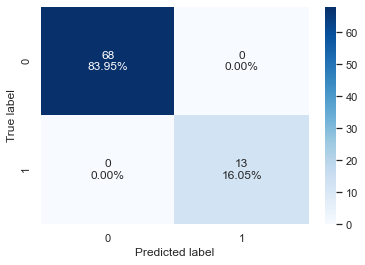

In [202]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_test, y_test)

**Upsampling**

In [203]:
print("Before UpSampling, counts of label '+': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label '-': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label '+': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label '-': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label '+': 52
Before UpSampling, counts of label '-': 270 

After UpSampling, counts of label '+': 270
After UpSampling, counts of label '-': 270 

After UpSampling, the shape of train_X: (540, 14)
After UpSampling, the shape of train_y: (540,) 



In [204]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

### Model performance after sampling

In [205]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.994444,0.996296,0.99262,0.994455


In [206]:
# Calculating different metrics on test set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_test, y_test
)
print("Testing performance:")
log_reg_over_val_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.987654,1.0,0.928571,0.962963


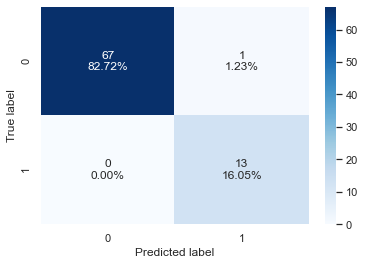

In [207]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_test, y_test)

### Random Forest

In [237]:
scorer = metrics.make_scorer(metrics.f1_score)

**Tuning Random Forest on Oversampled data**

In [228]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1, n_jobs = -1, class_weight='balanced')

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [500,700,900],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid,
                                   n_iter=50, 
                                   n_jobs = -1, 
                                   scoring=scorer, 
                                   cv=5, 
                                   random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 500, 'min_samples_leaf': 2, 'max_samples': 0.4, 'max_features': 'sqrt'} with CV score=0.9981308411214954:
Wall time: 1min 10s


In [229]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    n_jobs=-1,
    class_weight="balanced",
    max_features="sqrt",
    random_state=1,
    max_samples=0.4,
    n_estimators=500,
    min_samples_leaf=2,
)

tuned_rf2.fit(X_train_over, y_train_over)

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       max_samples=0.4, min_samples_leaf=2, n_estimators=500,
                       n_jobs=-1, random_state=1)

In [230]:
rf2_train_perf = model_performance_classification_sklearn(
    tuned_rf2, X_train_over, y_train_over
)

print("Training performance:")
rf2_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [232]:
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_test, y_test)

print("Testing performance:")
rf2_val_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


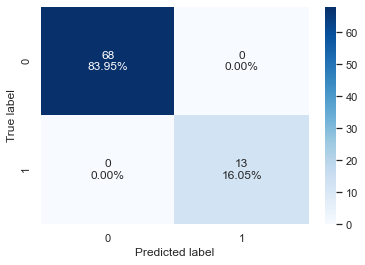

In [235]:
confusion_matrix_sklearn(tuned_rf2, X_test, y_test)

**Validation performance comparison**

In [236]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_val_perf.T,
        log_reg_over_val_perf.T,
        rf2_val_perf.T,
        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with Oversampled data",
    "Tuned Random Forest with Oversampled data",
    
]
print("Testing performance comparison:")
models_train_comp_df.style.highlight_max(axis=1)

Testing performance comparison:


,Logistic Regression,Logistic Regression with Oversampled data,Tuned Random Forest with Oversampled data
Accuracy,1.000000,0.987654,1.000000
Recall,1.000000,1.000000,1.000000
Precision,1.000000,0.928571,1.000000
F1,1.000000,0.962963,1.000000


**The logistic regression model did really well both before sampling and after sampling, predicting correctly the diabetic people. The random forest model did well too in its classification of diabetic people. In future, given more time, it'll be worth trying other classification models such as XGB and SVM to see how they would perform as well as using a cross validation method for purposes of experimentation to see the effect on performance**

**What I enjoyed the most:**

 Fitting the data into the models and interpreting the results

 **Most Challenging:**

 Tuning the random forest model

 **If I had more time:**
 Deal with outliers
 Try out other classification models such as SVMs to see what their performance would be